Struktur Folder

```
02 Solusi Numerik PDB Metode Euler dan Runge-Kutta Orde 4
| euler.py
| printSoln.py
| runkut4.py
| contoh2a.py
| contoh2b.py
```

## Metode Euler

In [4]:
##module euler
''' X,Y = integrate(F,x,y,xStop,h).
    Metode Euler untuk mencari solusi persamaan diferensial biasa
    {y}' = {F(x,{y})}, dimana
    {y} = {y[0],y[1],...y(n-1)}.
    x,y   = Kondisi awal
    xStop = Nilai x akhir
    h     = increment (interval) x
    F     = Fungsi yang ingin dipercahkan
            array F(x,y) = {y'[0],y'[1],...,y'[n-1]}.
'''
import numpy as np
def integrate(F,x,y,xStop,h):

    def euler(F,x,y,h):
        K0 = h*F(x,y)
        return K0

    X = []
    Y = []
    X.append(x)
    Y.append(y)
    while x < xStop:
        h = min(h,xStop - x)
        y = y + euler(F,x,y,h)
        x = x + h
        X.append(x)
        Y.append(y)
    return np.array(X),np.array(Y)

In [5]:
##module printSoln
''' printSoln(X,Y,freq).
    Memprint nilai X dan Y dari persamaan diferensial
        freq = n memprint nilai solusi tiap n iterasi
        freq = 0 memprint nilai solusi awal dan akhir
'''
def printSoln(X,Y,freq):

    def printHead(n):
        print ("\n     x ",end=" ")
        for i in range (n):
            print ("     y[",i,"] ",end=" ")
        print()

    def printLine(x,y,n):
        print ("%13.4e"% x,end=" ")
        for i in range (n):
            print ("%13.4e"% y[i],end=" ")
        print()

    m = len(Y)
    try: n = len(Y[0])
    except TypeError: n = 1
    if freq == 0: freq = m
    printHead(n)
    for i in range(0,m,freq):
        printLine(X[1],Y[1],n)
    if 1 != m - 1: printLine(X[m - 1],Y[m - 1],n)


---METODE NUMERIK PDB EULER---

     x       y[ 0 ]       y[ 1 ]  
   1.0000e-01    2.0000e-02   -2.0000e-03 
   1.0000e-01    2.0000e-02   -2.0000e-03 
   1.0000e-01    2.0000e-02   -2.0000e-03 
   1.0000e-01    2.0000e-02   -2.0000e-03 
   1.0000e-01    2.0000e-02   -2.0000e-03 
   1.0000e-01    2.0000e-02   -2.0000e-03 
   1.0000e-01    2.0000e-02   -2.0000e-03 
   1.0000e-01    2.0000e-02   -2.0000e-03 
   1.0000e-01    2.0000e-02   -2.0000e-03 
   1.0000e-01    2.0000e-02   -2.0000e-03 
   1.0000e-01    2.0000e-02   -2.0000e-03 
   1.0000e-01    2.0000e-02   -2.0000e-03 
   1.0000e-01    2.0000e-02   -2.0000e-03 
   1.0000e-01    2.0000e-02   -2.0000e-03 
   1.0000e-01    2.0000e-02   -2.0000e-03 
   1.0000e-01    2.0000e-02   -2.0000e-03 
   1.0000e-01    2.0000e-02   -2.0000e-03 
   1.0000e-01    2.0000e-02   -2.0000e-03 
   1.0000e-01    2.0000e-02   -2.0000e-03 
   1.0000e-01    2.0000e-02   -2.0000e-03 
   1.0000e-01    2.0000e-02   -2.0000e-03 
   1.0000e-01    2.0000e-02   

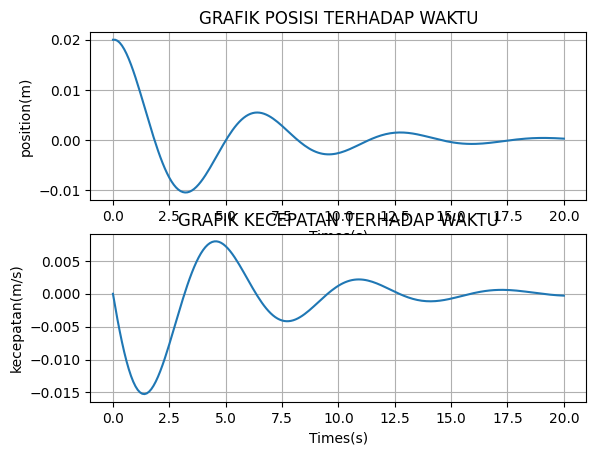

In [6]:
import numpy as np
#from printSoln import *
#from euler import *
import matplotlib.pyplot as plt

#input data
k = 2.00
m = 2.00
b = 1.00

#persamaan diferensial biasa
def F(x,y):
    F = np.zeros(2)
    F[0] = y[1]
    F[1] = -(k/m)*y[0] - (b/m)*y[1]

    return F

x = 0.0
xStop= 20.0
y = np.array([0.02,0]) #kondisi awal [y]
h = 0.1
freq = 1
#solusi numerik menggunakan Euler
X,Y = integrate(F,x,y,xStop,h)

#memprint nilai solusi numerik
print("---METODE NUMERIK PDB EULER---")
printSoln(X,Y,freq)

#memplot solusi untuk posisi
plt.subplot(2,1,1)
plt.plot(X,Y[:,0],'-')
plt.title("GRAFIK POSISI TERHADAP WAKTU")
plt.xlabel('Times(s)');plt.ylabel('position(m)')
plt.grid(True)

#memplot solusi untuk kecepatan
plt.subplot(2,1,2)
plt.plot(X,Y[:,1],'-')
plt.title("GRAFIK KECEPATAN TERHADAP WAKTU")
plt.xlabel('Times(s)');plt.ylabel('kecepatan(m/s)')
plt.grid(True)
plt.show()

#input("press return to exit")

---

## Metode Runge-Kutta Orde 4

In [7]:
##module run_kut4
''' X,Y = integrate(F,x,y,xStop,h).
    Menggunakan metode Runge-Kutta Orde-4 untuk mencari solusi
    Persamaan diferensial biasa {y}' = {F(x,(y))}, dimana
    {y} = {y[0],y[1],...y(n-1)}.
    x,y   = Kondisi awal
    xStop = Nilai x akhir
    h     = increment (interval) x yang digunakan
    F     = Fungsi yang ingin dipercahkan
            array F(x,y) = {y'[0],y'[1],...,y'[n-1]}.
'''
import numpy as np
def integrate(F,x,y,xStop,h):

    def run_kut4(F,x,y,h):
        K0 = h*F(x,y)
        K1 = h*F(x + h/2.0, y + K0/2.0)
        K2 = h*F(x + h/2.0, y + K1/2.0)
        K3 = h*F(x + h, y + K2)
        return (K0 + 2.0*K1 + 2.0*K2 + K3)/6.0

    X = []
    Y = []
    X.append(x)
    Y.append(y)
    while x < xStop:
        h = min(h,xStop - x)
        y = y + run_kut4(F,x,y,h)
        x = x + h
        X.append(x)
        Y.append(y)
    return np.array(X),np.array(Y)

---RUNGE-KUTTA 4th ORDER---

     x       y[ 0 ]       y[ 1 ]  
   1.0000e-01    1.9902e-02   -1.9476e-03 
   1.0000e-01    1.9902e-02   -1.9476e-03 
   1.0000e-01    1.9902e-02   -1.9476e-03 
   1.0000e-01    1.9902e-02   -1.9476e-03 
   1.0000e-01    1.9902e-02   -1.9476e-03 
   1.0000e-01    1.9902e-02   -1.9476e-03 
   1.0000e-01    1.9902e-02   -1.9476e-03 
   1.0000e-01    1.9902e-02   -1.9476e-03 
   1.0000e-01    1.9902e-02   -1.9476e-03 
   1.0000e-01    1.9902e-02   -1.9476e-03 
   1.0000e-01    1.9902e-02   -1.9476e-03 
   1.0000e-01    1.9902e-02   -1.9476e-03 
   1.0000e-01    1.9902e-02   -1.9476e-03 
   1.0000e-01    1.9902e-02   -1.9476e-03 
   1.0000e-01    1.9902e-02   -1.9476e-03 
   1.0000e-01    1.9902e-02   -1.9476e-03 
   1.0000e-01    1.9902e-02   -1.9476e-03 
   1.0000e-01    1.9902e-02   -1.9476e-03 
   1.0000e-01    1.9902e-02   -1.9476e-03 
   1.0000e-01    1.9902e-02   -1.9476e-03 
   1.0000e-01    1.9902e-02   -1.9476e-03 
   1.0000e-01    1.9902e-02   -1.

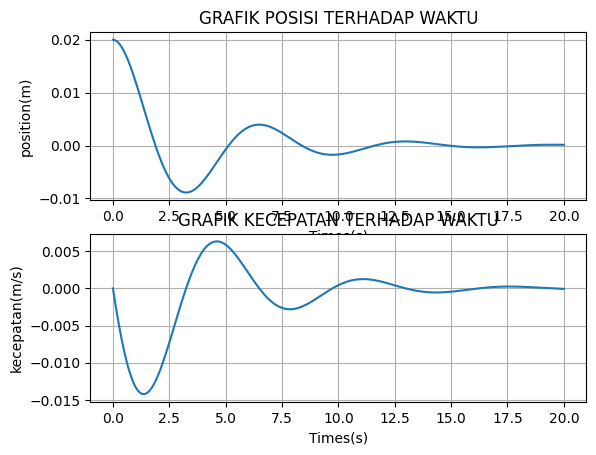

In [8]:
import numpy as np
#from printSoln import *
#from run_kut4 import *
import matplotlib.pyplot as plt

#input data
k = 2.00
m = 2.00
b = 1.00

#persamaan diferensial biasa
def F(x,y):
    F = np.zeros(2)
    F[0] = y[1]
    F[1] = -(k/m)*y[0] - (b/m)*y[1]

    return F

x = 0.0
xStop= 20.0
y = np.array([0.02,0]) #kondisi awal [y]
h = 0.1
freq = 1
#solusi numerik menggunakan Euler
X,Y = integrate(F,x,y,xStop,h)

#memprint nilai solusi numerik menggunakan Runge-Kutta Orde 4
print("---RUNGE-KUTTA 4th ORDER---")
printSoln(X,Y,freq)

#memplot solusi untuk posisi
plt.subplot(2,1,1)
plt.plot(X,Y[:,0],'-')
plt.title("GRAFIK POSISI TERHADAP WAKTU")
plt.xlabel('Times(s)');plt.ylabel('position(m)')
plt.grid(True)

#memplot solusi untuk kecepatan
plt.subplot(2,1,2)
plt.plot(X,Y[:,1],'-')
plt.title("GRAFIK KECEPATAN TERHADAP WAKTU")
plt.xlabel('Times(s)');plt.ylabel('kecepatan(m/s)')
plt.grid(True)
plt.show()

#input("press return to exit")